In [119]:
#Gaussian Process latent variable model
import os
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.nn import Parameter

import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
import pyro.ops.stats as stats

smoke_test = ('CI' in os.environ)  # ignore; used to check code integrity in the Pyro repo
#assert pyro.__version__.startswith('0.3.0')
pyro.enable_validation(True)       # can help with debugging
pyro.set_rng_seed(1)


In [121]:
import scipy.io
import sys
import numpy as np
df = scipy.io.loadmat('HW6P4.mat')

data= df['DataTrn']
ytrain = df['Datalabel']

print ("Bingo!")

Bingo!


In [122]:
#data = torch.tensor(df.values, dtype=torch.get_default_dtype())
# we need to transpose data to correct its shape
y = torch.from_numpy(data.T).double()

print (y)

index = ytrain.T[0].astype(np.double)
print (index)



for i in range(0,1000):
    if index[i] == 4.0: 
        index[i]=0.0;
    elif index[i] == 2.0:
        index[i]=0.5;
    elif index[i] == 1.0:
        index[i]=1.0
        
print(index)
torch_index = torch.from_numpy(index).double()
torch_index


#train_data = torch.utils.data.TensorDataset(y, torch_label)
#train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
from torch.autograd import Variable

y= Variable(y).float()
torch_index= Variable(torch_index).type(torch.LongTensor)



tensor([[ 0.3315,  0.0939,  0.5184,  ...,  0.6043,  1.0284, -0.0197],
        [ 0.2156,  1.0089,  0.2283,  ...,  0.4914,  0.0893,  0.7719],
        [ 0.6802,  0.0365,  0.5300,  ...,  1.0900,  0.4097,  0.4634],
        ...,
        [ 0.1530,  0.6085,  0.6130,  ...,  0.7549,  0.6586,  2.0232],
        [ 0.5856,  0.0631,  0.6705,  ...,  1.0654,  0.3508,  0.0250],
        [ 0.2573,  0.6597,  0.5202,  ...,  0.6278,  1.0086, -0.0265]],
       dtype=torch.float64)
[4. 2. 4. 2. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 2. 4. 1. 4. 4. 2. 2. 4. 1. 1.
 2. 2. 2. 2. 1. 4. 1. 1. 2. 2. 2. 2. 4. 4. 2. 4. 4. 1. 1. 2. 4. 1. 2. 4.
 1. 4. 2. 2. 2. 1. 1. 1. 4. 1. 1. 2. 4. 1. 2. 1. 4. 1. 2. 2. 1. 2. 1. 1.
 4. 1. 2. 4. 4. 1. 2. 1. 2. 2. 4. 2. 4. 1. 4. 2. 4. 4. 1. 2. 1. 1. 2. 2.
 1. 1. 2. 4. 2. 2. 2. 4. 1. 1. 1. 2. 1. 4. 1. 1. 2. 4. 4. 2. 2. 1. 4. 4.
 1. 2. 4. 2. 4. 1. 4. 4. 4. 2. 1. 2. 1. 1. 2. 4. 2. 1. 1. 4. 4. 2. 2. 4.
 2. 4. 1. 2. 1. 2. 4. 2. 2. 1. 4. 4. 4. 1. 4. 2. 4. 1. 1. 4. 1. 2. 1. 2.
 2. 2. 4. 1. 4. 4. 2. 1. 2.

In [123]:
#capture_time = y.new_tensor(label)
# we scale the time into the interval [0, 1]
time =torch_index



# we setup the mean of our prior over X
X_prior_mean = torch.zeros(1000, 2)  # shape: 437 x 2
X_prior_mean[:, 0] = time

print ("bingo!")

bingo!


In [124]:
kernel = gp.kernels.RBF(input_dim=2, lengthscale=torch.ones(2))

# we clone here so that we don't change our prior during the course of training
X = Parameter(X_prior_mean.clone())

# we will use SparseGPRegression model with num_inducing=32;
# initial values for Xu are sampled randomly from X_prior_mean
Xu = stats.resample(X_prior_mean.clone(), 32)
gplvm = gp.models.SparseGPRegression(X, y, kernel, Xu, noise=torch.tensor(0.01), jitter=1e-5)

print ("bingo!")

X.shape

bingo!


torch.Size([1000, 2])

In [125]:
# we use `.to_event()` to tell Pyro that the prior distribution for X has no batch_shape
gplvm.set_prior("X", dist.Normal(X_prior_mean, 0.1).to_event())
gplvm.autoguide("X", dist.Normal)

print ("bingo!")

bingo!


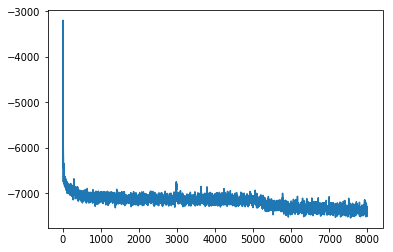

bingo!


In [134]:
# note that training is expected to take a minute or so
losses = gp.util.train(gplvm, num_steps=8000)

# let's plot the loss curve after 4000 steps of training
plt.plot(losses)
plt.show()

print ("bingo!")

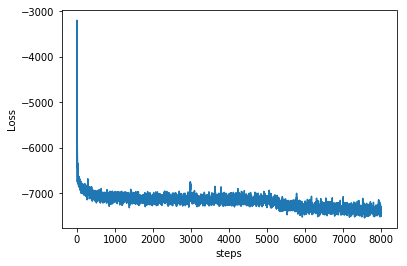

bingo!


In [137]:
plt.plot(losses)
plt.xlabel("steps")
plt.ylabel("Loss")
plt.show()

print ("bingo!")

In [135]:
gplvm.mode = "guide"
X = gplvm.X

print ("bingo!")
index

bingo!


array([0. , 0.5, 0. , 0.5, 1. , 0.5, 1. , 1. , 1. , 1. , 0.5, 0.5, 0. ,
       1. , 0.5, 0. , 1. , 0. , 0. , 0.5, 0.5, 0. , 1. , 1. , 0.5, 0.5,
       0.5, 0.5, 1. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0.5,
       0. , 0. , 1. , 1. , 0.5, 0. , 1. , 0.5, 0. , 1. , 0. , 0.5, 0.5,
       0.5, 1. , 1. , 1. , 0. , 1. , 1. , 0.5, 0. , 1. , 0.5, 1. , 0. ,
       1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 0. , 1. , 0.5, 0. , 0. , 1. ,
       0.5, 1. , 0.5, 0.5, 0. , 0.5, 0. , 1. , 0. , 0.5, 0. , 0. , 1. ,
       0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 0. , 0.5, 0.5, 0.5, 0. ,
       1. , 1. , 1. , 0.5, 1. , 0. , 1. , 1. , 0.5, 0. , 0. , 0.5, 0.5,
       1. , 0. , 0. , 1. , 0.5, 0. , 0.5, 0. , 1. , 0. , 0. , 0. , 0.5,
       1. , 0.5, 1. , 1. , 0.5, 0. , 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5,
       0. , 0.5, 0. , 1. , 0.5, 1. , 0.5, 0. , 0.5, 0.5, 1. , 0. , 0. ,
       0. , 1. , 0. , 0.5, 0. , 1. , 1. , 0. , 1. , 0.5, 1. , 0.5, 0.5,
       0.5, 0. , 1. , 0. , 0. , 0.5, 1. , 0.5, 0. , 0.5, 0.5, 0.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0.  0.5 0.  0.5 1.  0.5 1.  1.  1.  1.  0.5 0.5 0.  1.  0.5 0.  1.  0.
 0.  0.5 0.5 0.  1.  1.  0.5 0.5 0.5 0.5 1.  0.  1.  1.  0.5 0.5 0.5 0.5
 0.  0.  0.5 0.  0.  1.  1.  0.5 0.  1.  0.5 0.  1.  0.  0.5 0.5 0.5 1.
 1.  1.  0.  1.  1.  0.5 0.  1.  0.5 1.  0.  1.  0.5 0.5 1.  0.5 1.  1.
 0.  1.  0.5 0.  0.  1.  0.5 1.  0.5 0.5 0.  0.5 0.  1.  0.  0.5 0.  0.
 1.  0.5 1.  1.  0.5 0.5 1.  1.  0.5 0.  0.5 0.5 0.5 0.  1.  1.  1.  0.5
 1.  0.  1.  1.  0.5 0.  0.  0.5 0.5 1.  0.  0.  1.  0.5 0.  0.5 0.  1.
 0.  0.  0.  0.5 1.  0.5 1.  1.  0.5 0.  0.5 1.  1.  0.  0.  0.5 0.5 0.
 0.5 0.  1.  0.5 1.  0.5 0.  0.5 0.5 1.  0.  0.  0.  1.  0.  0.5 0.  1.
 1.  0.  1.  0.5 1.  0.5 0.5 0.5 0.  1.  0.  0.  0.5 1.  0.5 0.  0.5 0.5
 0.  0.  0.  0.  0.5 1.  0.5 1.  0.5 0.5 0.5 0.  1.  1.  0.  1.  1.  0.
 1.  0.  1.  0.  0.  0.  0.5 0.  0.5 1.  0.  0.  0.5 0.  0.5 0.5 0.5 1.
 1.  0.  0.5 1.  0.5 1.  0.5 0.  0.  0.5 0.  0.  0.  1.  0.5 0.  0.5 0.5
 0.5 0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.5 0.5 0.5 1. 

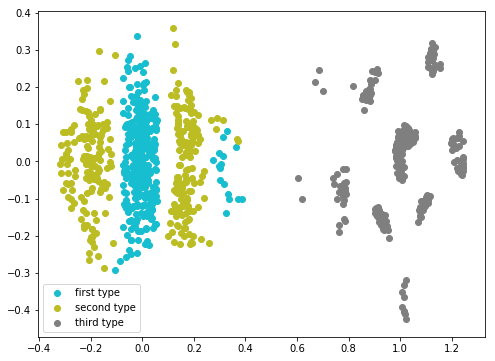

bingo!


In [136]:
plt.figure(figsize=(8, 6))
colors = plt.get_cmap("tab10").colors[::-1]
labels = [0,0.5,1]

print (index)

labeltype = ["first type","second type","third type"]

X = gplvm.X_loc.detach().numpy()
for i, label in enumerate(labels):
    X_i = X[index == label]
    plt.scatter(X_i[:, 0], X_i[:, 1], c=colors[i], label=labeltype[i])

plt.legend()
#plt.xlabel("pseudotime", fontsize=14)
#plt.ylabel("branching", fontsize=14)
#plt.title("GPLVM on Single-Cell qPCR data", fontsize=16)
plt.show()

print ("bingo!")

In [23]:
labels

Index(['1', '2', '4', '8', '16', '32 TE', '32 ICM', '64 PE', '64 TE',
       '64 EPI'],
      dtype='object')